In [212]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

In [213]:
def readData(dataset):
    pd.set_option('display.max_columns', None)
    data = pd.read_csv(dataset)
    return data

In [214]:
data = readData('top_10000_1960-now.csv')
data.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,Disc Number,Track Number,Track Duration (ms),Track Preview URL,Explicit,Popularity,ISRC,Added By,Added At,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,1,3,216270,NaN,False,0,QMARG1760056,spotify:user:bradnumber1,2020-03-05T09:20:39Z,"acid house,ambient house,big beat,hip house",0.617,0.872,8.0,-12.305,1.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,1,3,237120,https://p.scdn.co/mp3-preview/d6f8883fc955cb0e...,False,64,USJAY0900144,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"dance pop,miami hip hop,pop",0.825,0.743,2.0,-5.995,1.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,1,6,312533,https://p.scdn.co/mp3-preview/1de5faef947224dc...,False,56,USJI19910455,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"dance pop,pop",0.677,0.665,7.0,-5.171,1.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,1,11,233400,https://p.scdn.co/mp3-preview/c4df3a832509cc55...,False,42,GB5KW1499822,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"album rock,art rock,british invasion,classic r...",0.683,0.728,9.0,-8.920,1.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,1,9,448720,NaN,False,0,USA176910100,spotify:user:bradnumber1,2021-08-08T09:26:31Z,"album rock,british invasion,classic rock,rock",0.319,0.627,0.0,-9.611,1.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [215]:
dataset = data.drop(columns=['Track URI', 'Track Name', 'Artist URI(s)', 'Album URI', 'Album Artist URI(s)', 'Album Image URL', 'Track Preview URL', 'ISRC', 'Copyrights', 'Added By', 'Album Genres', 'Added At', 'Disc Number', 'Track Number', 'Album Artist Name(s)'])
dataset.head()

,Artist Name(s),Album Name,Album Release Date,Track Duration (ms),Explicit,Popularity,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
0,The KLF,Songs Collection,1992-08-03,216270,False,0,"acid house,ambient house,big beat,hip house",0.617,0.872,8.0,-12.305,1.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,Jams Communications
1,Pitbull,Pitbull Starring In Rebelution,2009-10-23,237120,False,64,"dance pop,miami hip hop,pop",0.825,0.743,2.0,-5.995,1.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records
2,Britney Spears,...Baby One More Time (Digital Deluxe Version),1999-01-12,312533,False,56,"dance pop,pop",0.677,0.665,7.0,-5.171,1.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,Jive
3,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",2014-10-20,233400,False,42,"album rock,art rock,british invasion,classic r...",0.683,0.728,9.0,-8.920,1.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records
4,The Rolling Stones,Let It Bleed,1969-12-05,448720,False,0,"album rock,british invasion,classic rock,rock",0.319,0.627,0.0,-9.611,1.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group


In [216]:
dataset.describe()

,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,9.999000e+03,9999.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,2.248150e+05,37.624662,0.607925,0.683281,5.167750,-7.269217,0.698410,0.065138,0.208589,0.029331,0.185777,0.585459,121.496650,3.960488
std,5.410012e+04,29.460808,0.145869,0.191131,3.578392,3.281731,0.458971,0.061324,0.248842,0.123576,0.149194,0.239105,26.260686,0.250927
min,0.000000e+00,0.000000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000
25%,1.925795e+05,0.000000,0.515000,0.560000,2.000000,-9.070000,0.000000,0.033100,0.018400,0.000000,0.089200,0.398000,102.642000,4.000000
50%,2.199060e+05,42.000000,0.617000,0.712000,5.000000,-6.518000,1.000000,0.042900,0.095600,0.000006,0.128000,0.598000,120.653000,4.000000
75%,2.502600e+05,64.000000,0.710000,0.835000,8.000000,-4.887000,1.000000,0.067500,0.318000,0.000561,0.245000,0.783000,134.328000,4.000000
max,1.561133e+06,98.000000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000


In [217]:
dataset=dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9446 entries, 0 to 9998
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Artist Name(s)       9446 non-null   object 
 1   Album Name           9446 non-null   object 
 2   Album Release Date   9446 non-null   object 
 3   Track Duration (ms)  9446 non-null   int64  
 4   Explicit             9446 non-null   bool   
 5   Popularity           9446 non-null   int64  
 6   Artist Genres        9446 non-null   object 
 7   Danceability         9446 non-null   float64
 8   Energy               9446 non-null   float64
 9   Key                  9446 non-null   float64
 10  Loudness             9446 non-null   float64
 11  Mode                 9446 non-null   float64
 12  Speechiness          9446 non-null   float64
 13  Acousticness         9446 non-null   float64
 14  Instrumentalness     9446 non-null   float64
 15  Liveness             9446 non-null   float6

In [218]:
numericData = dataset.select_dtypes(include=['int', 'float'])
numericData

,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,216270,0,0.617,0.872,8.0,-12.305,1.0,0.0480,0.015800,0.112000,0.4080,0.504,111.458,4.0
1,237120,64,0.825,0.743,2.0,-5.995,1.0,0.1490,0.014200,0.000021,0.2370,0.800,127.045,4.0
2,312533,56,0.677,0.665,7.0,-5.171,1.0,0.0305,0.560000,0.000001,0.3380,0.706,74.981,4.0
3,233400,42,0.683,0.728,9.0,-8.920,1.0,0.2590,0.568000,0.000051,0.0384,0.833,75.311,4.0
4,448720,0,0.319,0.627,0.0,-9.611,1.0,0.0687,0.675000,0.000073,0.2890,0.497,85.818,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,165800,79,0.623,0.727,11.0,-5.570,0.0,0.0562,0.184000,0.000020,0.3090,0.400,125.975,4.0
9995,176640,17,0.720,0.841,9.0,-6.373,1.0,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0
9996,227619,62,0.719,0.806,9.0,-6.802,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0
9997,153442,87,0.534,0.855,1.0,-4.923,0.0,0.1830,0.060700,0.000263,0.3460,0.420,122.060,4.0


In [219]:
numericData.describe()

,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,9.446000e+03,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.00000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000
mean,2.255781e+05,38.538747,0.608168,0.685176,5.176371,-7.197891,0.69765,0.065562,0.204485,0.026908,0.185229,0.583383,121.562274,3.961571
std,5.413862e+04,29.627115,0.145697,0.189766,3.583477,3.248467,0.45930,0.061830,0.245704,0.116918,0.147560,0.238876,26.315202,0.251001
min,9.122600e+04,0.000000,0.000000,0.000020,0.000000,-29.368000,0.00000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000
25%,1.933232e+05,0.000000,0.515000,0.564000,2.000000,-8.903000,0.00000,0.033200,0.018225,0.000000,0.089200,0.396000,102.602250,4.000000
50%,2.204465e+05,44.000000,0.617000,0.713000,5.000000,-6.452000,1.00000,0.043100,0.092600,0.000005,0.128000,0.595000,120.505000,4.000000
75%,2.512498e+05,65.000000,0.710000,0.836000,8.000000,-4.862000,1.00000,0.067900,0.308750,0.000487,0.245000,0.780000,134.479500,4.000000
max,1.561133e+06,98.000000,0.988000,0.997000,11.000000,2.769000,1.00000,0.711000,0.987000,0.985000,0.989000,0.995000,217.913000,5.000000


<Axes: >

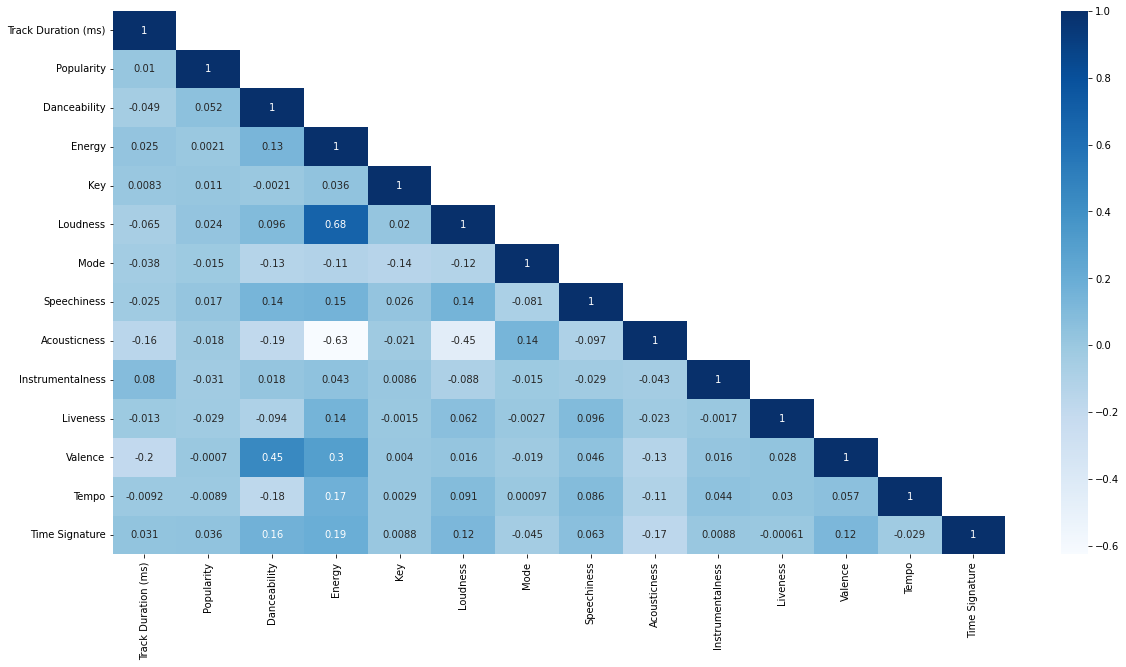

In [220]:
corr_matrix = numericData.corr()
plt.figure(figsize=(20, 10))
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool_))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

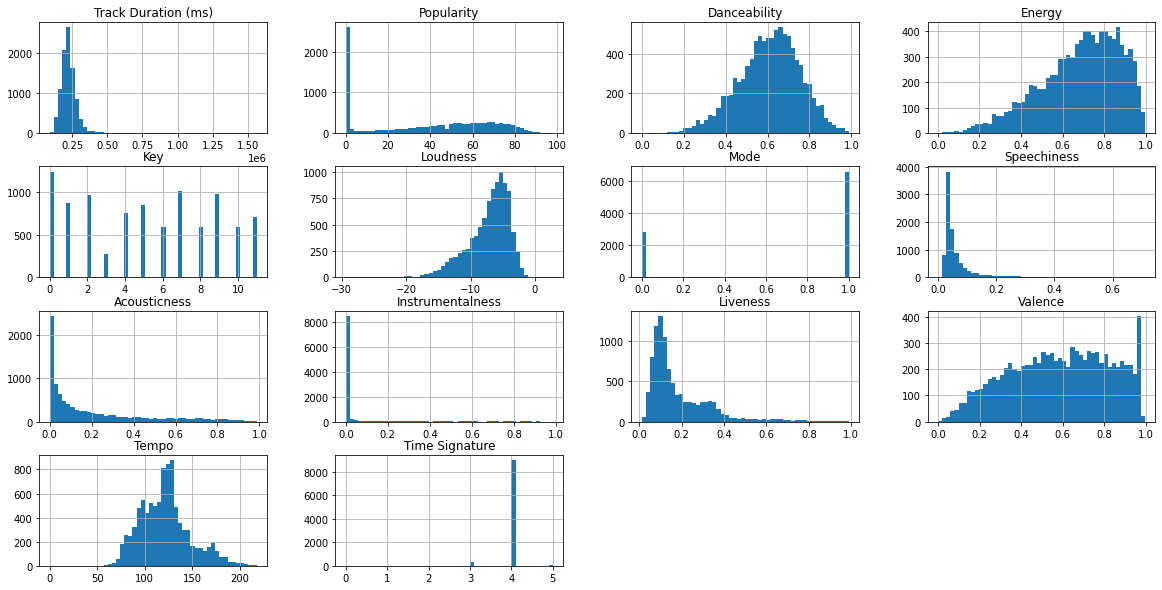

In [221]:
dataset.hist(figsize=(20, 10), bins=50)
plt.show()

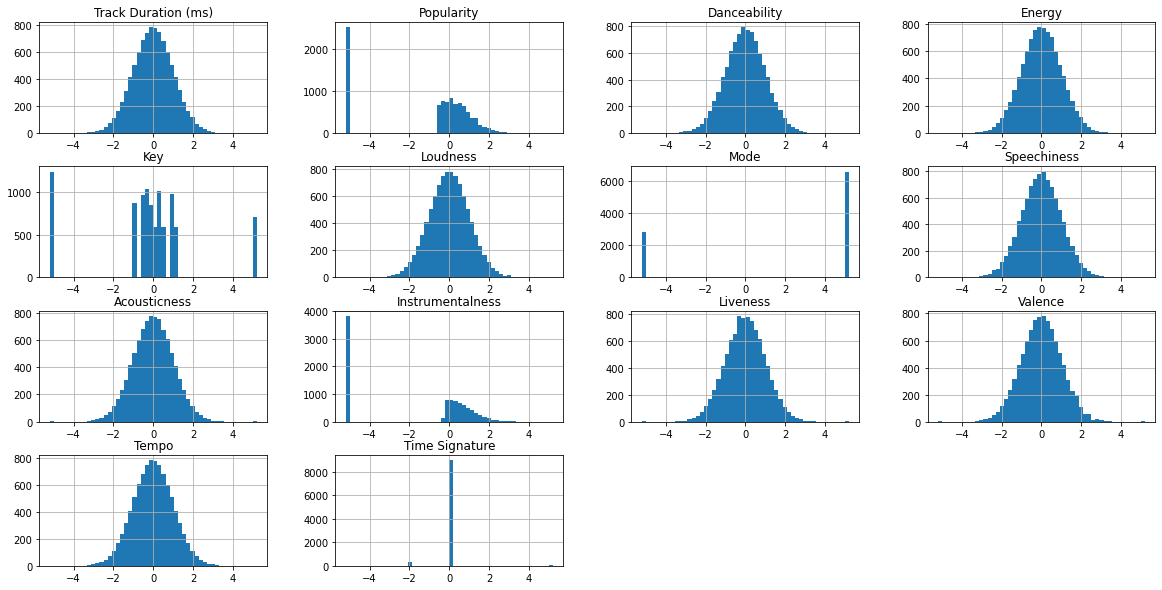

In [222]:
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
normalData = pd.DataFrame(quantile_transformer.fit_transform(numericData), columns=numericData.columns)
normalData.hist(figsize=(20, 10), bins=50)
plt.show()

In [223]:
normalData

,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,-0.098527,-5.199338,-0.002509,0.928105,0.602943,-1.349627,5.199338,0.198258,-0.733156,1.611333,1.497997,-0.309743,-0.355745,0.041413
1,0.393584,0.647177,1.571286,0.158740,-0.598435,0.167640,5.199338,1.418119,-0.771450,0.206674,0.642543,0.752997,0.315737,0.041413
2,1.633323,0.360172,0.426601,-0.241963,0.362850,0.516557,5.199338,-1.006211,1.140077,-0.239405,1.116369,0.373591,-2.204416,0.041413
3,0.305712,-0.043924,0.472407,0.085414,0.879040,-0.677768,5.199338,1.914506,1.154615,0.329487,-2.180738,0.901416,-2.149300,0.041413
4,2.643206,-5.199338,-1.831224,-0.408805,-5.199338,-0.822823,5.199338,0.686350,1.394900,0.384387,0.855287,-0.334851,-1.434568,0.041413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9441,-1.286702,1.517545,0.031369,0.079120,5.199338,0.336917,-5.199338,0.436240,0.344154,0.200692,0.947580,-0.656486,0.254270,0.041413
9442,-1.033987,-0.457033,0.751333,0.713599,0.879040,0.029120,5.199338,-0.590949,-1.885771,1.182214,1.116369,0.621099,0.548458,0.041413
9443,0.161547,0.573115,0.741388,0.494971,0.879040,-0.116903,-5.199338,-0.217488,-2.195675,1.566360,1.275302,0.094232,0.110082,0.041413
9444,-1.588414,2.307607,-0.562796,0.803958,-0.924252,0.639462,-5.199338,1.584354,-0.191439,0.582716,1.166919,-0.590949,0.063198,0.041413


In [224]:
normalData.describe()

,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000,9446.000000
mean,-0.000081,-1.059183,0.000144,-0.000008,-0.220389,-0.000064,2.055296,0.000169,0.000083,-1.717031,0.000076,0.000159,0.000018,-0.012573
std,1.000762,2.574114,1.001190,1.001122,2.425451,1.000637,4.776116,1.000335,1.001163,2.915473,1.001133,1.000953,1.000735,0.584748
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.674019,-5.199338,-0.675277,-0.676854,-0.598435,-0.674113,-5.199338,-0.668987,-0.676066,-5.199338,-0.673702,-0.673702,-0.675056,0.041413
50%,-0.000662,0.002509,-0.002509,-0.002509,-0.050204,0.000213,5.199338,0.001255,0.000389,0.000200,0.005018,0.001255,-0.000307,0.041413
75%,0.674063,0.691121,0.676854,0.676854,0.602943,0.674057,5.199338,0.674900,0.674884,0.674877,0.673702,0.676854,0.675305,0.041413
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


In [225]:
highTempo = normalData[normalData['Tempo'] > 0.01]
lowTempo = normalData[normalData['Tempo'] <= 0.01]

In [226]:
print(highTempo.shape)
print(lowTempo.shape)

(4688, 14)
(4758, 14)


# Question1: 
### Music in which tempo range are more likely to be listened by people?
### using _Two-sample t-test_

In [227]:
alpha = 0.05 
stat, p_value = sp.ttest_ind(highTempo.Popularity, lowTempo.Popularity, equal_var=True, alternative='two-sided')
print(stat, p_value)

-0.7809343119124558 0.4348607045688503


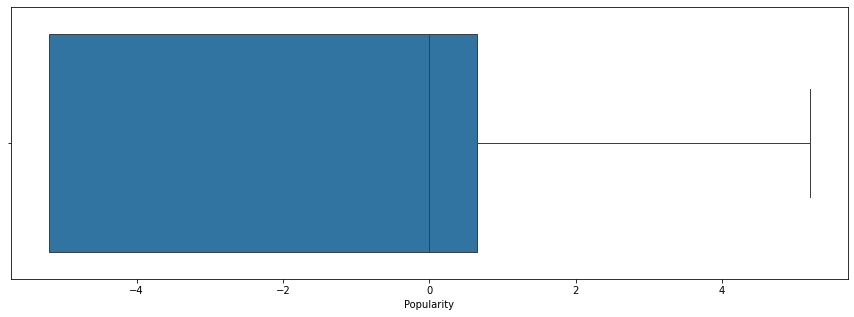

In [228]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=highTempo['Popularity'])
plt.show()

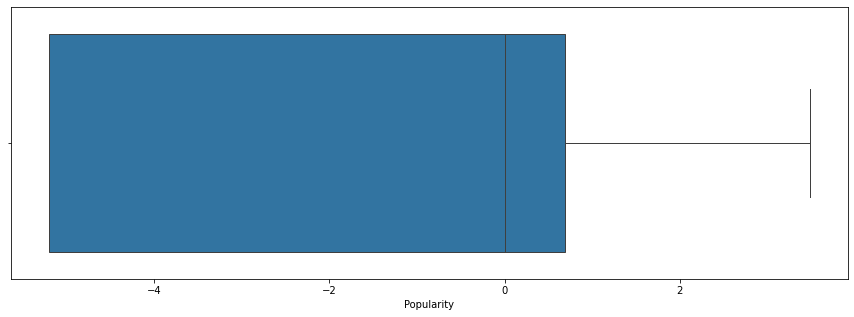

In [229]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=lowTempo['Popularity'])
plt.show()

In [230]:
highTempoPop = pd.DataFrame(data=np.array(highTempo['Popularity']), columns=['hPopularity'])
lowTempoPop = pd.DataFrame(data=np.array(lowTempo['Popularity']), columns=['mPopularity'])

In [231]:
energy = pd.concat([highTempoPop, lowTempoPop])

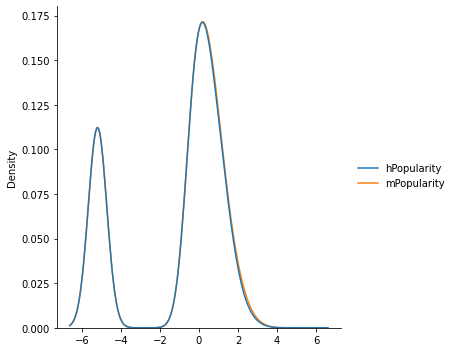

In [232]:
sns.displot(data=energy, kind='kde')

# Question2: 
### Do people prefer to listen to long music or short music?
### using _Two-sample t-test_

In [233]:
longMusic = normalData[normalData['Track Duration (ms)'] > 0.05]
shortMusic = normalData[normalData['Track Duration (ms)'] <= 0.05]

In [234]:
print(longMusic.shape)
print(shortMusic.shape)

(4534, 14)
(4912, 14)


In [235]:
alpha = 0.05 
stat, p_value = sp.ttest_ind(longMusic.Popularity, shortMusic.Popularity, equal_var=True, alternative='two-sided')
print(stat, p_value)

-4.4174621508372125 1.00979217255089e-05


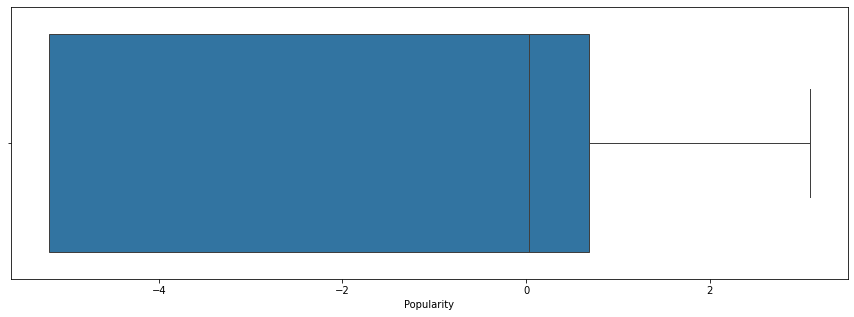

In [236]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=longMusic['Popularity'])
plt.show()

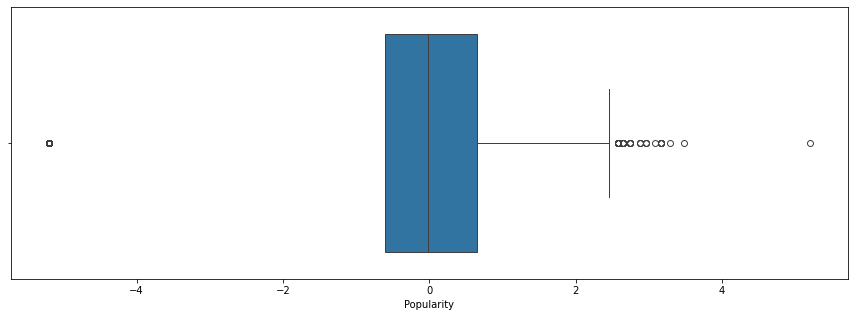

In [237]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=shortMusic['Popularity'])
plt.show()

In [238]:
genres = {'1'}
allGen = dataset['Artist Genres']
for item in allGen:
    list = item.split(',')
    for listItem in list:
        genres.add(listItem.lower())

In [239]:
print(len(genres))

909


# Question3:
### Does beiing energetic affect popularity of songs?
### using _ANOVA test_

In [240]:
lowEnergy = normalData[normalData['Energy'] < -0.2]
moderateEnergy = normalData[(normalData['Energy'] >= -0.2) & (normalData['Energy'] < 0.6)]
highEnergy = normalData[normalData['Energy'] >= 0.6]

In [241]:
print(lowEnergy.shape)
print(moderateEnergy.shape)
print(highEnergy.shape)

(3968, 14)
(2887, 14)
(2591, 14)


In [242]:
alpha = 0.05 
stat, p_value = sp.f_oneway(lowEnergy.Popularity, moderateEnergy.Popularity, highEnergy.Popularity)
print(stat, p_value)

3.06088688218844 0.04689261192140764


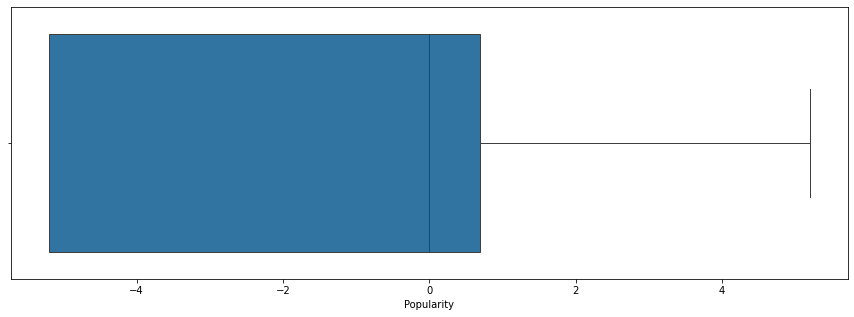

In [243]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=lowEnergy['Popularity'])
plt.show()

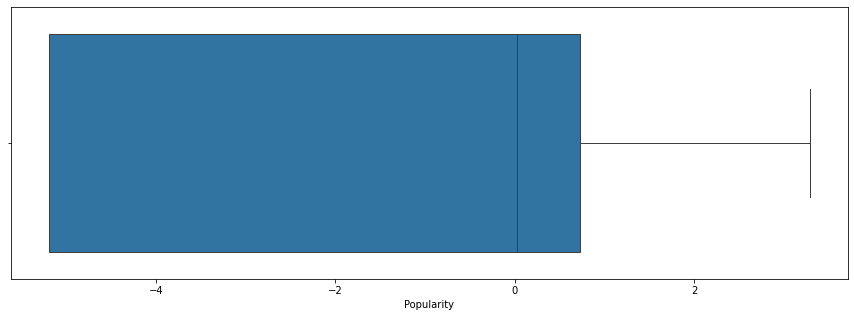

In [244]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=moderateEnergy['Popularity'])
plt.show()

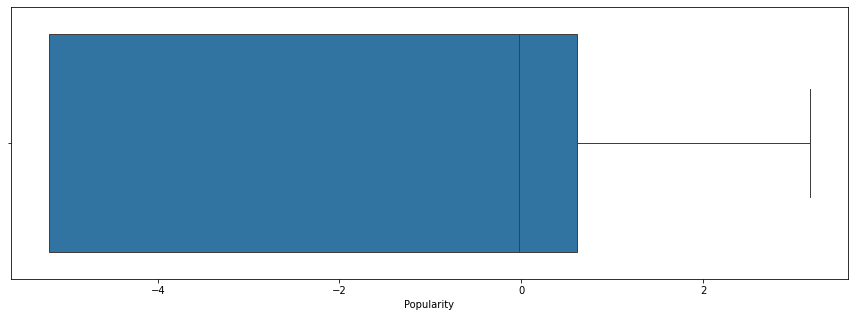

In [245]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=highEnergy['Popularity'])
plt.show()

In [246]:
hPopularity = pd.DataFrame(data=np.array(highEnergy['Popularity']), columns=['hPopularity'])
mPopularity = pd.DataFrame(data=np.array(moderateEnergy['Popularity']), columns=['mPopularity'])
lPopularity = pd.DataFrame(data=np.array(lowEnergy['Popularity']), columns=['lPopularity'])

In [247]:
energy = pd.concat([hPopularity, mPopularity, lPopularity])
energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9446 entries, 0 to 3967
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hPopularity  2591 non-null   float64
 1   mPopularity  2887 non-null   float64
 2   lPopularity  3968 non-null   float64
dtypes: float64(3)
memory usage: 295.2 KB


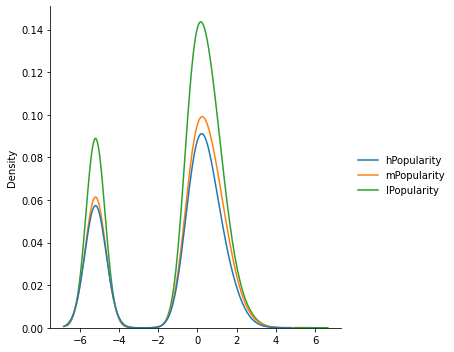

In [248]:
sns.displot(data=energy, kind='kde')

# Question4:
### How does loudness relate to energy?
### Using _ANOVA_ test

In [249]:
alpha = 0.05 
stat, p_value = sp.f_oneway(lowEnergy.Loudness, moderateEnergy.Loudness, highEnergy.Loudness)
print(stat, p_value)

2427.414723646101 0.0


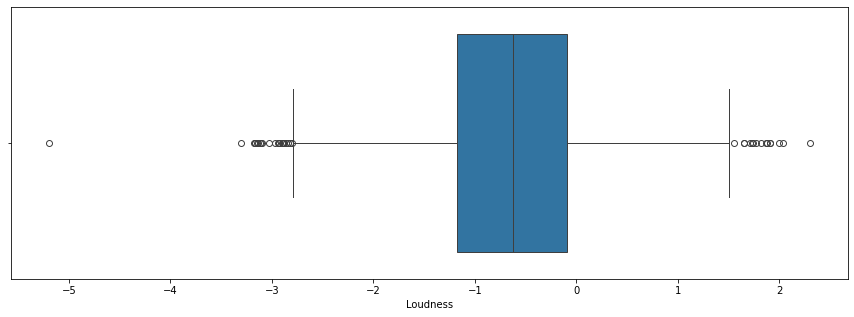

In [250]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=lowEnergy['Loudness'])
plt.show()

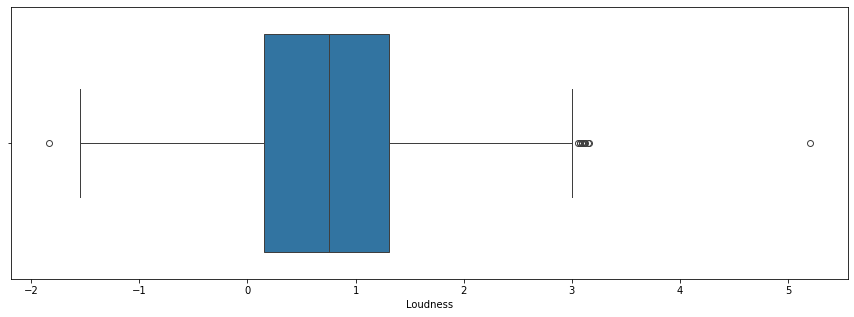

In [251]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=highEnergy['Loudness'])
plt.show()

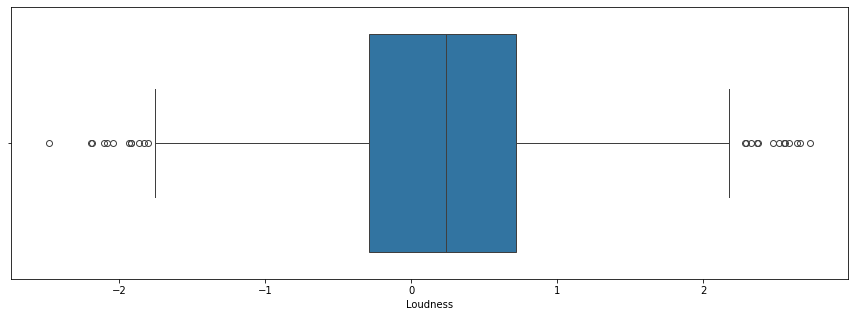

In [252]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=moderateEnergy['Loudness'])
plt.show()

In [253]:
hLoudness = pd.DataFrame(data=np.array(highEnergy['Loudness']), columns=['hLoudness'])
mLoudness = pd.DataFrame(data=np.array(moderateEnergy['Loudness']), columns=['mLoudness'])
lLoudness = pd.DataFrame(data=np.array(lowEnergy['Loudness']), columns=['lLoudness'])

In [254]:
energy = pd.concat([hLoudness, mLoudness, lLoudness])

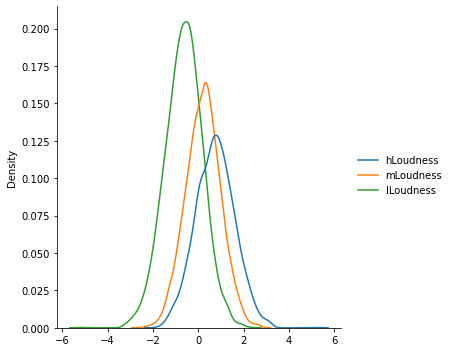

In [255]:
sns.displot(data=energy, kind='kde')

# Question5:
### Is danceability related to popularity?
### using _Two-sample t-test_

In [256]:
highDance = normalData[normalData['Danceability'] >= 0]
lowDance = normalData[normalData['Danceability'] < 0]

In [257]:
print(lowDance.shape)
print(highDance.shape)

(4728, 14)
(4718, 14)


In [258]:
alpha = 0.05 
stat, p_value = sp.ttest_ind(highDance.Popularity, lowDance.Popularity, equal_var=True, alternative='two-sided')
print(stat, p_value)

2.0877468616177786 0.036847406269173204


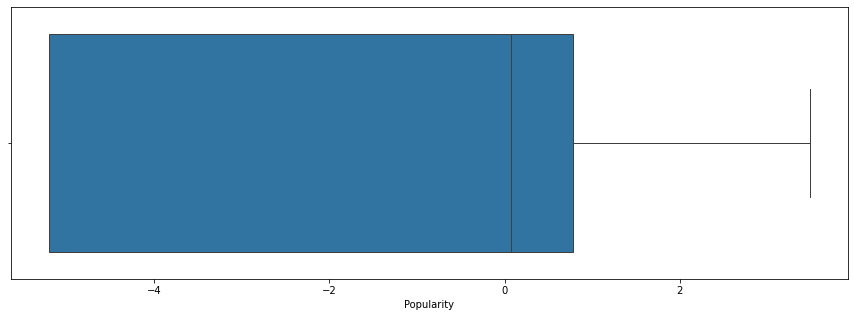

In [259]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=highDance['Popularity'])
plt.show()

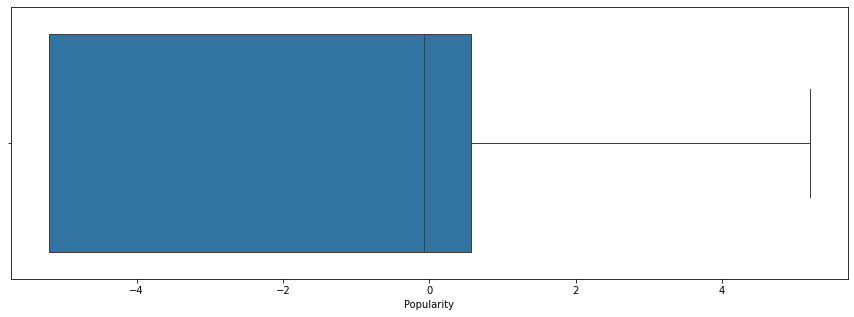

In [260]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=lowDance['Popularity'])
plt.show()

In [261]:
highDance_popularity = pd.DataFrame(data=np.array(highDance['Popularity']), columns=['hDance_popularity'])
lowDance_popularity = pd.DataFrame(data=np.array(lowDance['Popularity']), columns=['lDance_popularity'])

In [262]:
popularity = pd.concat([highDance_popularity, lowDance_popularity])
popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9446 entries, 0 to 4727
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hDance_popularity  4718 non-null   float64
 1   lDance_popularity  4728 non-null   float64
dtypes: float64(2)
memory usage: 221.4 KB


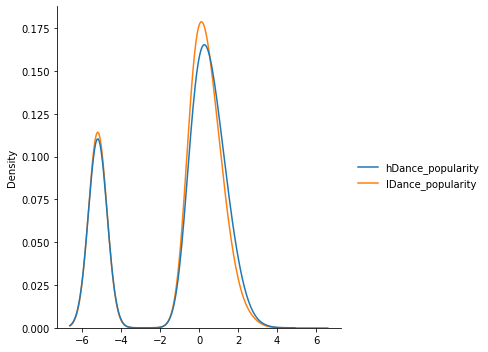

In [263]:
sns.displot(data=popularity, kind='kde')